<a href="https://colab.research.google.com/github/gauravtailor8520/Big-Data/blob/main/Wine_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Random Forest Classification**
## In pyspark

In [ ]:
# install
!pip install Pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e6820d6dcc5d5b03ab25645a605ce3ab440dacce8ef8ca2a8311f4ca94c1ffa2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built Pyspark


In [ ]:
# start spark session
from pyspark.sql import SparkSession

In [ ]:
spark=SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
# read sklearn inbuilt data
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
wine = wine.frame
wine = spark.createDataFrame(wine)

In [ ]:
wine.show()

+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+------+
|alcohol|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|target|
+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+------+
|  14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0|     0|
|   13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4| 1050.0|     0|
|  13.16|      2.36|2.67|             18.6|    101.0|          2.8|      3.24|                 

In [ ]:
wine.printSchema()

root
 |-- alcohol: double (nullable = true)
 |-- malic_acid: double (nullable = true)
 |-- ash: double (nullable = true)
 |-- alcalinity_of_ash: double (nullable = true)
 |-- magnesium: double (nullable = true)
 |-- total_phenols: double (nullable = true)
 |-- flavanoids: double (nullable = true)
 |-- nonflavanoid_phenols: double (nullable = true)
 |-- proanthocyanins: double (nullable = true)
 |-- color_intensity: double (nullable = true)
 |-- hue: double (nullable = true)
 |-- od280/od315_of_diluted_wines: double (nullable = true)
 |-- proline: double (nullable = true)
 |-- target: long (nullable = true)



In [ ]:
wine.columns

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
featureassembler= VectorAssembler(inputCols=['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline'], outputCol='Features')

In [ ]:
output = featureassembler.transform(wine)

In [ ]:
output.show()

+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+------+--------------------+
|alcohol|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|target|            Features|
+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+------+--------------------+
|  14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0|     0|[14.23,1.71,2.43,...|
|   13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4| 1050.0|     0|[13.2,1.78,2

In [ ]:
modeldata=output.select('Features','target')

In [ ]:
modeldata.show()

+--------------------+------+
|            Features|target|
+--------------------+------+
|[14.23,1.71,2.43,...|     0|
|[13.2,1.78,2.14,1...|     0|
|[13.16,2.36,2.67,...|     0|
|[14.37,1.95,2.5,1...|     0|
|[13.24,2.59,2.87,...|     0|
|[14.2,1.76,2.45,1...|     0|
|[14.39,1.87,2.45,...|     0|
|[14.06,2.15,2.61,...|     0|
|[14.83,1.64,2.17,...|     0|
|[13.86,1.35,2.27,...|     0|
|[14.1,2.16,2.3,18...|     0|
|[14.12,1.48,2.32,...|     0|
|[13.75,1.73,2.41,...|     0|
|[14.75,1.73,2.39,...|     0|
|[14.38,1.87,2.38,...|     0|
|[13.63,1.81,2.7,1...|     0|
|[14.3,1.92,2.72,2...|     0|
|[13.83,1.57,2.62,...|     0|
|[14.19,1.59,2.48,...|     0|
|[13.64,3.1,2.56,1...|     0|
+--------------------+------+
only showing top 20 rows



In [ ]:
# split data
train_data,test_data=modeldata.randomSplit([0.8,0.2])

In [ ]:
train_data.show()

+--------------------+------+
|            Features|target|
+--------------------+------+
|[11.64,2.06,2.46,...|     1|
|[11.65,1.67,2.62,...|     1|
|[11.66,1.88,1.92,...|     1|
|[11.84,0.89,2.58,...|     1|
|[11.84,2.89,2.23,...|     1|
|[11.96,1.09,2.3,2...|     1|
|[12.0,0.92,2.0,19...|     1|
|[12.08,1.13,2.51,...|     1|
|[12.16,1.61,2.31,...|     1|
|[12.17,1.45,2.53,...|     1|
|[12.21,1.19,1.75,...|     1|
|[12.33,1.1,2.28,1...|     1|
|[12.37,0.94,1.36,...|     1|
|[12.37,1.13,2.16,...|     1|
|[12.37,1.17,1.92,...|     1|
|[12.67,0.98,2.24,...|     1|
|[12.7,3.87,2.4,23...|     1|
|[12.72,1.81,2.2,1...|     1|
|[12.85,1.6,2.52,1...|     0|
|[13.03,0.9,1.71,1...|     1|
+--------------------+------+
only showing top 20 rows



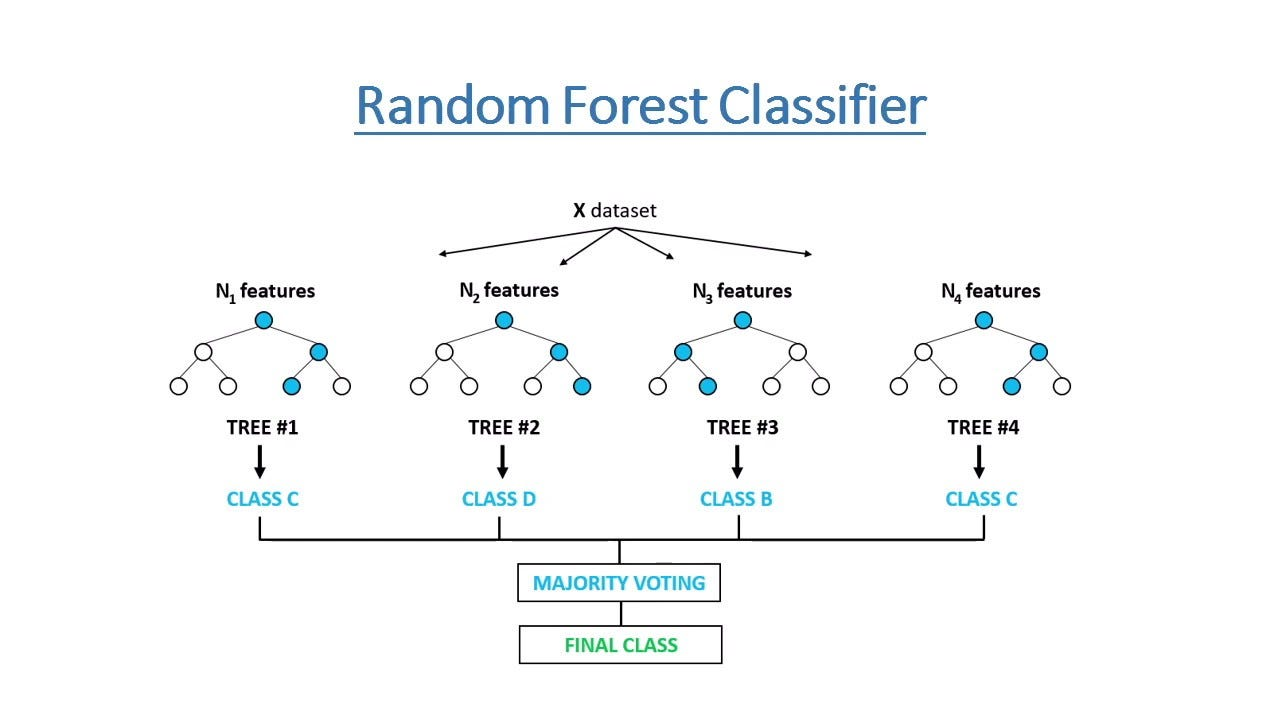

In [ ]:
# Random Forest classification model
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(featuresCol='Features', labelCol='target')

In [ ]:
rf = rf.fit(train_data)

In [ ]:
# prediction
y_pred = rf.transform(test_data)

In [ ]:
y_pred.show()

+--------------------+------+--------------+---------------+----------+
|            Features|target| rawPrediction|    probability|prediction|
+--------------------+------+--------------+---------------+----------+
|[12.29,1.61,2.21,...|     1|[1.0,12.0,7.0]|[0.05,0.6,0.35]|       1.0|
|[12.33,0.99,1.95,...|     1|[2.0,18.0,0.0]|  [0.1,0.9,0.0]|       1.0|
|[12.37,1.21,2.56,...|     1|[0.0,18.0,2.0]|  [0.0,0.9,0.1]|       1.0|
|[12.64,1.36,2.02,...|     1|[0.0,9.0,11.0]|[0.0,0.45,0.55]|       2.0|
|[12.93,3.8,2.65,1...|     0|[14.0,5.0,1.0]|[0.7,0.25,0.05]|       0.0|
|[12.99,1.67,2.6,3...|     1|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[13.05,1.73,2.04,...|     0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[13.05,3.86,2.32,...|     1|[3.0,4.0,13.0]|[0.15,0.2,0.65]|       2.0|
|[13.11,1.01,1.7,1...|     1| [9.0,8.0,3.0]|[0.45,0.4,0.15]|       0.0|
|[13.71,1.86,2.36,...|     0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[13.82,1.75,2.42,...|     0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|    

In [ ]:
# confusion matrix
y_pred.groupBy('target', 'prediction').count().show()

+------+----------+-----+
|target|prediction|count|
+------+----------+-----+
|     1|       0.0|    2|
|     1|       2.0|    2|
|     0|       0.0|    9|
|     1|       1.0|   14|
|     2|       2.0|    9|
+------+----------+-----+



In [ ]:
from sklearn.metrics import confusion_matrix
pred=y_pred.select("prediction").collect()
orig=y_pred.select("target").collect()
print(confusion_matrix(orig, pred))

[[ 9  0  0]
 [ 2 14  2]
 [ 0  0  9]]


(f1|accuracy|weightedPrecision|weightedRecall|weightedTruePositiveRate| weightedFalsePositiveRate|weightedFMeasure|truePositiveRateByLabel| falsePositiveRateByLabel|precisionByLabel|recallByLabel|fMeasureByLabel| logLoss|hammingLoss)

In [ ]:
# evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol='target', predictionCol='prediction')

In [ ]:
accuracy = evaluator.evaluate(y_pred)
accuracy

0.8875000000000001

In [ ]:
# close connection to spark
spark.stop()